In [1]:
from scipy.special import expi,sici
import matplotlib.pyplot as plt
import numpy as np
from qutip import heom,sigmaz,sigmax,brmesolve

---
title: 1/f Noise
date: 2024-08-08
authors:
  - name: Gerardo Suarez
---
### Dertivation of $\frac{1}{f}$ Noise based on [1](https://www.nii.ac.jp/qis/first-quantum/e/forStudents/lecture/pdf/noise/chapter9.pdf) and [2](https://arxiv.org/pdf/physics/0204033)

Nearly all optical and electronic systems, are subject to the so called $\frac{1}{f}$ noise. While a physical mechanism for $\frac{1}{f}$ noide is yet to be identified. There are specific physical models that give rise to $\frac{1}{f}$ noise. However, those are not necessarily unique.

Perhaps the Most relevant one, is $\frac{1}{f}$ arising from a superposition of train pulses. 

#### Superposition of train pulses

##### A Noisy waveform

Consider a Noisy waveform $x(t)$ with a band pass filtered such that the power spectral density

\begin{align}\label{eq:spectrum}
S(\omega) =   \begin{cases}
    \frac{\alpha}{\omega}, & \text{for } \omega_{L} \leq \omega \leq \omega_{H} \\
    0, & \text{otherwise} 
  \end{cases} =  \frac{\alpha}{\omega} \theta(\omega_{H}- \omega) \theta(\omega- \omega_{L})
\end{align}

Then the auto-correlation function of $x(t)$ is then given by

\begin{align}
C(\tau) = \langle x(t) x(t+\tau)\rangle
\end{align}

Let us remember that the power spectrum and the correlation function are related by

\begin{align}
S(\omega) &= \int_{-\infty}^{\infty} dt e^{i \omega t} C(t)
&= \mathcal{F}(C(t))
\end{align}

Then 

\begin{align}
 \mathcal{F}^{-1} (S(\omega)) = \mathcal{F}^{-1}(\mathcal{F}(C(t))) = C(t)
\end{align}

So finally we can write

\begin{align}
C(t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} d\omega e^{-i \omega t} S(\omega)
\end{align}

By substituting the power spectrum Eq. @eq:spectrum then 

\begin{align}
C(t) &= \frac{\alpha}{2 \pi} \int_{\omega_{L}}^{\omega_{H}} \frac{d\omega}{\omega} e^{-i \omega t}
\end{align}

Which results in 

\begin{align}
C(t) &= \frac{\alpha}{2 \pi} \left( E_{i}(\omega_{H} t) - E_{i}(\omega_{L} t)\right)
\end{align}

where $E_{i}$ is the exponential integral function. 

:::{warning}
At this stage we are going to assume that this is a scalar stationary process, this means that the correlation function is even, which is not necessarily the case. In fact this model does not mathematically follow this. One could consider the imaginary (Quantum part of the noise as well)

Then

$$C(t) = \frac{C(t)-C(-t)}{2}  = \frac{\alpha}{2 \pi} \int_{\omega_{L}}^{\omega_{H}} \frac{d\omega}{\omega} \cos\left( \omega t\right)$$

and 

\begin{align}
C(t) &= \frac{\alpha}{2 \pi} \left( C_{i}(\omega_{H} t) - C_{i}(\omega_{L} t)\right)
\end{align}

where $C_{i}$ is the cosine integral function. 
:::

#### The noisy waveform in terms of Train pulses (From Lorentzians)

Let us consider the waveform behaves like an exponential relaxation process. This would mean that our autocorrelatio function is given by

$$C(\tau) = \begin{cases}
A_{0} e^{-\lambda t}& \text{for } t>0 \\
0 & \text{for } t<0 
\end{cases}
$$

It's Fourier transform is given by

$$\mathcal{F}(C(\tau)) &= \int_{-\infty}^{\infty}e^{i \omega t} C(\tau) dt =  A_{0} \int_{0}^{\infty}e^{-(\lambda-i \omega) t} dt \\
&= \frac{A_{0}}{\lambda-i \omega}$$

If instead of a pulse we have a train of pulses 

$$ C(\tau) = \sum_{k}C(t,t_{k}) = \sum_{k}\begin{cases}
A_{0} e^{-\lambda (t-t_{k})}& \text{for } t>t_{k} \\
0 & \text{for } t<t_{k} 
\end{cases}
$$

Then it's Fourier transform is given by

$$\mathcal{F}(C(\tau)) &= \int_{-\infty}^{\infty}e^{i \omega t} C(\tau) dt =  A_{0} \int_{0}^{\infty}e^{-(\lambda-i \omega) t} dt \\
&= \frac{A_{0}}{\lambda-i \omega} \sum_{k}e^{i \omega t_{k}}$$

From here we can find the power spectrum via averaging

$$S(\omega) = lim_{T \to \infty } \frac{1}{T} \langle |\mathcal{F}(C(\tau))|^{2}\rangle   = \frac{A_{0}^{2}}{\lambda^{2} + \omega^{2} }lim_{T \to \infty } \frac{\langle |\sum_{k}e^{i \omega t_{k}}|^{2} \rangle }{T}$$

If

$$n=lim_{T \to \infty } \frac{\langle |\sum_{k}e^{i \omega t_{k}}|^{2} \rangle }{T}$$

Then we can write

$$S(\omega)   = \frac{A_{0}^{2} n}{\lambda^{2} + \omega^{2}}$$

By identifying $\tau_{z}=\lambda^{-1}$ as the time scale of the pulses, and $g(\tau_{z}) = A_{0}^{2} n \tau_{z}^{2}$ as the pulse generation details we may write the more popular expression 

$$S(\omega)   = \frac{g(\tau_{z})}{1 + (\tau_{z}\omega)^{2}}$$

This is indeed a power spectrum, but it does not behave as $\frac{1}{f}$. However, suppose now that the noisy waveform we are considering is made out of a linear superposition of such processes and that  it's decay time scales are between $\tau_{1}$ and $\tau_{2}$ with probability density $P(\tau_{z})$ then the power spectrum of such superposition is given by

$$S(\omega)   = \int_{\tau_{1}}^{\tau_{2}} d\tau_{z} P(\tau_{z}) \frac{g(\tau_{z})}{1 + (\tau_{z}\omega)^{2}}$$


If we now assume that $P(\tau_{z})g(\tau_{z}) \propto 1$. Meaning that it is independent of the decay time scale. Then 

$$S(\omega)   = \int_{\tau_{1}}^{\tau_{2}} d\tau_{z}  \frac{\alpha}{1 + (\tau_{z}\omega)^{2}} = \frac{\alpha}{\omega} \left( \tan^{-1}(\omega \tau_{2}) - \tan^{-1}(\omega \tau_{1})  \right)$$

Finally when $\omega \tau_{2} \gg 1$ and $ 0 < \omega \tau_{1} \ll 1$ we have

$$\tan^{-1}(\omega \tau_{2}) \approx  \frac{\pi}{2} \quad \tan^{-1}(\omega \tau_{2}) \approx  0$$

So that in this regime, the superposition of different relaxation processes gives rise to the $\frac{1}{f}$ spectrum 

$$ S(\omega) = \frac{\alpha \pi}{2 \omega}$$

On the other hand if $P(\tau_{z})g(\tau_{z}) \propto \tau_{z}^{\beta-1}$ then 

$$S(\omega)   = \int_{\tau_{1}}^{\tau_{2}} d\tau_{z}  \frac{\alpha \tau_{z}^{\beta-1}}{1 + (\tau_{z}\omega)^{2}} = \frac{\alpha}{\beta} \left( \tau_{2}^{\beta} F_{1}\left(1,\frac{\beta}{2},1+\frac{\beta}{2},-\omega^{2} \tau_{2}^{2}\right) - \tau_{1}^{\beta} F_{1}\left(1,\frac{\beta}{2},1+\frac{\beta}{2},-\omega^{2} \tau_{1}^{2}\right) \right)$$

using the same limit

$$ S(\omega) \propto \frac{\alpha \pi}{2 \omega^{\beta}}$$


In [2]:
def ci(x):
    return (expi(1j*x)+expi(-1j*x))/2

In [3]:
def correlation(t,wl=1,wh=10000,alpha=0.1):
    cc=alpha*(ci(wh*t)-ci(wl*t))/(2)
    if isinstance(t,np.ndarray):
        if t[0]==0:
            cc[0]=0
    else:
        if t==0:
            return 0
    return cc

In [4]:
times=np.linspace(0,500,2000)

In [5]:
Q=sigmaz()

In [6]:
time2=np.linspace(0,1500,5000)

In [7]:
cfiitter2 = heom.CorrelationFitter(
    Q, 0, time2, correlation)
bath1, fit2info = cfiitter2.get_fit(Ni=1, Nr=8,full_ansatz=True)#sigma=1e-6,lower=[-10,-np.inf,-3,-10],upper=[10,0,3,10],guesses=[0,-0.5,1,-0.1]

/tmp/ipykernel_212282/1893926815.py:2: RuntimeWarning: invalid value encountered in divide
  return (expi(1j*x)+expi(-1j*x))/2
/tmp/ipykernel_212282/4132130175.py:2: RuntimeWarning: invalid value encountered in subtract
  cc=alpha*(ci(wh*t)-ci(wl*t))/(2)


In [8]:
print(fit2info['summary'])

Fit correlation class instance: 
 
Result of fitting The Real Part Of                                      |Result of fitting The Imaginary Part                                    
 the Correlation Function with 8 terms:                                 | Of the Correlation Function with 1 terms:                              
                                                                        |                                                                        
 Parameters|    a     |    b     |    c     |    d                      | Parameters|    a     |    b     |    c     |    d                      
 1         |-9.21e-01 |-2.01e+00 | 3.45e-01 |8.29e-01                   | 1         | 0.00e+00 | 0.00e+00 | 0.00e+00 |0.00e+00                   
 2         | 3.91e-01 |-1.05e-01 |-9.40e-01 |2.04e+00                   |                                                                        
 3         | 6.69e-02 |-4.51e+00 |-1.00e+00 |1.97e+00                   |A  normalized RM

In [9]:
times3=np.linspace(0,800,5000)

**Issue:** The correlation function does not decay like one would expect. Most likely this is going to make things difficult, unless one devices how to do it with lorentzians in a limit, or some alternate formulation that yields an easier fit

/tmp/ipykernel_212282/1893926815.py:2: RuntimeWarning: invalid value encountered in divide
  return (expi(1j*x)+expi(-1j*x))/2
/tmp/ipykernel_212282/4132130175.py:2: RuntimeWarning: invalid value encountered in subtract
  cc=alpha*(ci(wh*t)-ci(wl*t))/(2)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


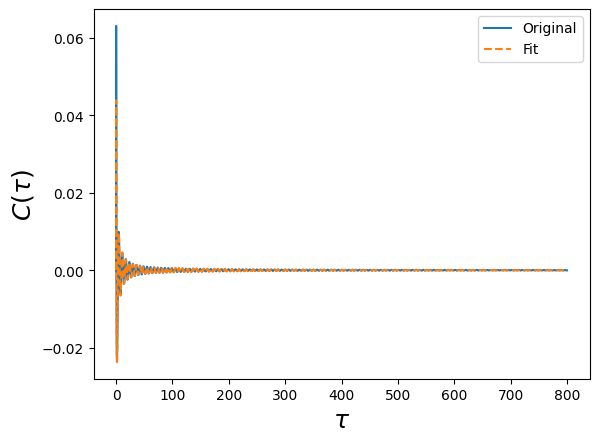

In [10]:
plt.plot(times3,correlation(times3),label="Original")
plt.plot(times3,bath1.correlation_function_approx(times3),"--",label="Fit")
#plt.xlim(300,500)
#plt.ylim(-0.00015,0.0003)
plt.ylabel(r"$C(\tau)$",fontsize=18)
plt.xlabel(r"$\tau$",fontsize=18)
plt.legend()
plt.show()

The fit of the correlation function is good, does this approximation actually show $\frac{1}{f}$ spectrum

In [11]:
def spectrum_f(w,alpha=0.1):
    try:
        s=np.heaviside(np.abs(w)-1,0)*np.heaviside(10000-np.abs(w),0)*(alpha/abs(w))/(2*np.pi)
    except:
        return 0
    return s

In [12]:
w=np.linspace(0,100,1000)

/home/mcditoos/qutip_gsoc_app/qutip/solver/heom/bofin_baths.py:510: RuntimeWarning: invalid value encountered in divide
  S += 2 * np.real((coeff) / (exp.vk - 1j*w))
/tmp/ipykernel_212282/2788424138.py:3: RuntimeWarning: divide by zero encountered in divide
  s=np.heaviside(np.abs(w)-1,0)*np.heaviside(10000-np.abs(w),0)*(alpha/abs(w))/(2*np.pi)
/tmp/ipykernel_212282/2788424138.py:3: RuntimeWarning: invalid value encountered in multiply
  s=np.heaviside(np.abs(w)-1,0)*np.heaviside(10000-np.abs(w),0)*(alpha/abs(w))/(2*np.pi)


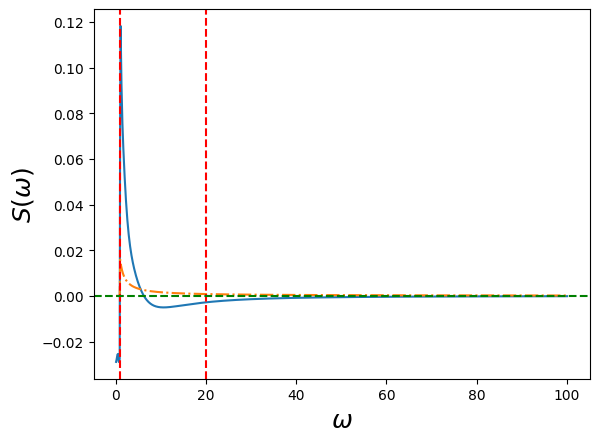

In [13]:
plt.plot(w,bath1.power_spectrum_approx(w),label="Fit")
plt.plot(w, spectrum_f(w),"-.",label=r"$\frac{1}{f}$")
plt.axvline(1,color="red",linestyle="dashed")
plt.axvline(20,color="red",linestyle="dashed")
plt.axhline(0,color="green",linestyle="dashed")
#plt.ylim(-0.1,0.1)
#plt.xlim(0,20)
plt.ylabel(r"$S(\omega)$",fontsize=18)
plt.xlabel(r"$\omega$",fontsize=18)
plt.show()

it does behave sort of like 1/f  as wanted, Maybe using AAA would be better since overthere one actually fits the spectrum. Better support points here and lower/upper/guesses may also yield faster simulations. But for now maybe it's good

In [14]:
H=sigmax() +sigmaz()

In [15]:
rho0= (1+sigmaz())/2
rho0

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [16]:
solver = heom.HEOMSolver(H,
                          [bath1], max_depth=3, options={"atol": 1e-14,"nsteps":100000})
result = solver.run(rho0, times)

10.0%. Run time:   1.92s. Est. time left: 00:00:00:17
20.0%. Run time:   3.37s. Est. time left: 00:00:00:13
30.0%. Run time:   4.82s. Est. time left: 00:00:00:11
40.0%. Run time:   6.31s. Est. time left: 00:00:00:09
50.0%. Run time:   7.69s. Est. time left: 00:00:00:07
60.0%. Run time:   9.11s. Est. time left: 00:00:00:06
70.0%. Run time:  10.58s. Est. time left: 00:00:00:04
80.0%. Run time:  11.92s. Est. time left: 00:00:00:02
90.0%. Run time:  13.47s. Est. time left: 00:00:00:01
100.0%. Run time:  15.11s. Est. time left: 00:00:00:00
Total run time:  15.11s


In [17]:
a_ops = [[Q, spectrum_f]]
resultBR = brmesolve(H, rho0, times, a_ops=a_ops, options={
    "atol": 1e-14}, sec_cutoff=-1)
# a_ops = [[Q, spectrum_f2]]
# resultBR2 = brmesolve(H, rho0, times, a_ops=a_ops, options={
#     "atol": 1e-14}, sec_cutoff=-1)

### Classical Noise approach

To cross-check results from heom we take the approach outline in [1](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.95.052126)

Thanks again for the code neill !

In [18]:
import numpy as np
from scipy.integrate import quad

def integral(function,*args,**kwargs):
    if 'x_i' not in kwargs:
          raise Exception('Missing x_i, {} instead'.format(kwargs.keys()))
    if 'x_f' not in kwargs:
          raise Exception('Missing x_f, {} instead'.format(kwargs.keys()))
    x_i = kwargs['x_i']
    x_f = kwargs['x_f']
    limit = kwargs['limit']
    def function_real(x,*args):
        return np.real(function(x,*args))
    def function_imag(x,*args):
        return np.imag(function(x,*args))
        
    quadv = np.vectorize(quad)

    return quadv(function_real, x_i, x_f,args=args,limit=limit)[0] + 1j * quadv(function_imag, x_i, x_f,args=args,limit=limit)[0]

In [19]:
from scipy.interpolate import CubicSpline
from qutip import Qobj,QobjEvo,spre,spost,liouvillian,mesolve

In [20]:
#from qutip import *


###############
#Attempt to construct purely rate-based version
#follow PRA 95, 052126 equation 42 onwards
# V = c_corr_list * s 
def TimeDepRates(H_S, V, corr, tlist):
    print('Computing rates({length})'.format(length="tlist"))

    #given H_S, corr and tlist construct a superoperator for the time-dependent-rate MS.
    if not isinstance(H_S, (Qobj, QobjEvo)):
            raise TypeError("The Hamiltonian (H) must be a Qobj or QobjEvo")
            
    if not isinstance(V, (Qobj, QobjEvo)):
            raise TypeError("The coupling operator must be a Qobj or QobjEvo")                
    
    if H_S.type != "oper": 
            raise TypeError("The Hamiltonian (H) must be an operator not a state or superoperator")
    
    if V.type != "oper": 
            raise TypeError("The coupling operator must be an operator not a state or superoperator")
    
    energies,states = H_S.eigenstates()
    def com(V):
        return spre(V) - spost(V)
    
    C_array = np.zeros([len(tlist),len(states),len(states)], dtype = np.complex64)
    
    
    def soft(t,ws):
    
        return(corr(t)*np.exp(1.0j * ws * t))
    
    #simple version:
    
    for i in range(len(energies)):
        for j in range(len(energies)):
            for k, t in enumerate(tlist):
                Deltaij = energies[i] - energies[j]
                if V.matrix_element(states[i],states[j])!=0:
                    C_array[k, i, j] = integral(soft, Deltaij, x_i=0, x_f=t, limit=500)
        
    Vt = com(sum([QobjEvo([(V.matrix_element(states[i], states[j])*states[i] * states[j].dag()), 
                           CubicSpline(tlist, C_array[:,i,j])]) 
                 for i in range(len(states)) for j in range(len(states))]))
    
    
    L = liouvillian(QobjEvo(H_S)) - com(QobjEvo(V))*Vt
        
    return L

In [ ]:
import time
start=time.time()
L=TimeDepRates(H,Q,correlation,times)
end=time.time()
print(end-start)

Computing rates(tlist)


/tmp/ipykernel_212282/1893926815.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return (expi(1j*x)+expi(-1j*x))/2
/tmp/ipykernel_212282/4132130175.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  cc=alpha*(ci(wh*t)-ci(wl*t))/(2)
/tmp/ipykernel_212282/1229277698.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  C_array[k, i, j] = integral(soft, Deltaij, x_i=0, x_f=t, limit=500)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/numpy/lib/function_base.py:2360: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return self.pyfunc(*the_args, **kwargs)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/numpy/lib/function_ba

In [50]:
sol_me=mesolve(L,rho0,times)

 ### Using AAA

 AAA works great but to get great fits I need a lot of RAM, For some reason I can't connect to Pitchfork or Torch. So perhaps the results in the section below can be way better

 The idea is that since one fits the spectrum directly. It may provide faster and better fits

In [51]:
import scipy as sp

In [52]:
def aaa(F, Z, tol=1e-13, mmax=100):

    if ~ (type(F)==np.array):
        F = F(Z)
    M =len(Z)
    J = list(range(0,M))
    z = np.empty(0)
    f = np.empty(0)
    C = []
    errors = []
    R = np.mean(F) * np.ones_like(F)
    for m in range(mmax):
        # find largest residual
        j = np.argmax(abs(F - R))
        z = np.append(z, Z[j])
        f = np.append(f, F[j])
        try:
            J.remove(j)
        except:
            pass

        # Cauchy matrix containing the basis functions as columns
        C = 1.0 / (Z[J,None] - z[None,:])
        # Loewner matrix
        A = (F[J,None] - f[None,:]) * C

        # compute weights as right singular vector for smallest singular value
        _, _, Vh = np.linalg.svd(A)
        wj = Vh[-1, :].conj()


        # approximation: numerator / denominator
        N = C.dot(wj * f)
        D = C.dot(wj)

        # update residual
        R = F.copy()
        R[J] = N / D

        # check for convergence
        errors.append(np.linalg.norm(F - R, np.inf))
        if errors[-1] <= tol * np.linalg.norm(F, np.inf):
            break
    r= lambda x: approximated_function(x,z,f,wj)
    #return z,f,wj
    pol,res,zer=prz(z,f,wj)
    return r,pol,res,zer
def approximated_function(zz,z,f,w,need=False):
    # evaluate r at zz
    zv = np.ravel(zz)  # vectorize zz

    # Cauchy matrix
    CC = 1 / (np.subtract.outer(zv, z))

    # AAA approximation as vector
    r = np.dot(CC, w * f) / np.dot(CC, w)
    if need is True:
        return np.dot(CC, w * f),np.dot(CC, w * f)
    # Find values NaN = Inf/Inf if any
    ii = np.isnan(r)

    # Force interpolation at NaN points
    for j in np.where(ii)[0]:
        r[j] = f[np.where(zv[j] == z)[0][0]]

    # Reshape the result to match the shape of zz
    r = r.reshape(zz.shape)
    return r

def prz(z,f,w):
    m=len(w)
    B=np.eye(m+1)
    B[0,0]=0
    E = np.block([[0,w],[np.ones((m,1)),np.diag(z)]])
    eigvals=sp.linalg.eig(E,B)[0]
    pol= np.real_if_close(eigvals[np.isfinite(eigvals)])#eigvals[~np.isinf(eigvals)] #remove singularities
    # Get residues from quotients, in the paper they use a little shift 
    # but I coudn't broadcast it correctly
    C=1.0/(pol[:,None]-z[None,:])
    N=C.dot(f*w)
    D=(-C**2).dot(w) #Derivative, formula for simple poles see Zill complex analysis
    res=N/D
    ez=np.block([[0,w],[f[:,None],np.diag(z)]])
    eigvals_zeros=sp.linalg.eig(ez,B)[0]
    zer= eigvals_zeros[~np.isinf(eigvals_zeros)]
    return pol,res,zer


In [53]:
w=np.linspace(-200,200,1000)

In [54]:
# Z=np.concatenate((-np.logspace(2,-5,900),np.logspace(-5,2,900)))+0j
# #Z=np.linspace(0.001,1000,10000)
# #F=lambda w : np.pi*0.05*(w)*np.exp(-abs(w)/20)*(1/(np.exp(w/1)-1) +1)
# #r,pol,res,zer=aaa(F,Z,tol=1e-8)
# r,pol,res,zer=aaa(spectrum_f,Z,tol=1e-8,mmax=24)
#Z=np.concatenate((-np.logspace(5,-3,1000),np.logspace(-3,5,1000)))+0j
Z=np.linspace(-1000,1000,5000)
#F=lambda w : np.pi*0.05*(w)*np.exp(-abs(w)/20)*(1/(np.exp(w/1)-1) +1)
#r,pol,res,zer=aaa(F,Z,tol=1e-8)
r,pol,res,zer=aaa(spectrum_f,Z,tol=1e-13,mmax=24)

/tmp/ipykernel_212282/958776843.py:3: DeprecationWarning: Bitwise inversion '~' on bool is deprecated. This returns the bitwise inversion of the underlying int object and is usually not what you expect from negating a bool. Use the 'not' operator for boolean negation or ~int(x) if you really want the bitwise inversion of the underlying int.
  if ~ (type(F)==np.array):


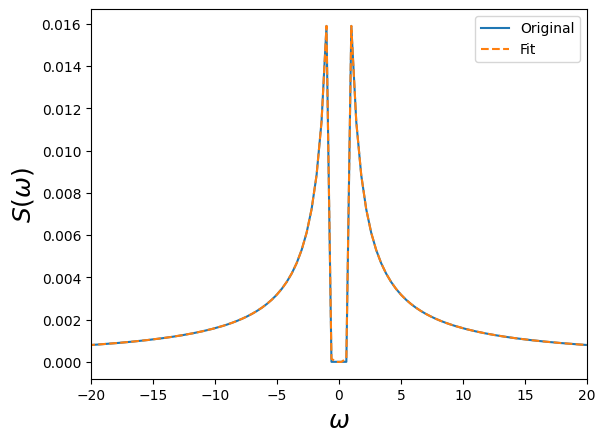

In [55]:
plt.plot(w,spectrum_f(w),label="Original")
plt.plot(w,r(w),"--",label="Fit")
plt.ylabel(r"$S(\omega)$",fontsize=18)
plt.xlabel(r"$\omega$",fontsize=18)
plt.xlim(-20,20)
plt.legend()
plt.show()

Way better $\frac{1}{f}$ behaviour except at the origin but still great. However, when I limit the number of exponents this is just as bad as the other fitting approach (but a lot faster). Could be better when tried with more RAM, specially since we only care about the spectrum here. Not the correlation function

In [56]:
def filter_poles(pol,res):
    pols=[]
    ress=[]
    for i in range(len(pol)):
        if (np.imag(pol[i])<0):
            pols.append(pol[i])
            ress.append(res[i])
    return np.array(pols),np.array(ress)

In [57]:
new_pols,new_res=filter_poles(pol,res)

In [58]:
ckAR,ckAI=np.real(-1j*new_res),np.imag(-1j*new_res)
vkAR,vkAI=np.real(1j*new_pols),np.imag(1j*new_pols)

In [59]:
def correlation_from_exponents(ck,vk,t):
    c=0
    for i in range(len(ck)):
        c+=(ck[i])*np.exp(-vk[i]*t)
    return 2*np.pi*np.real(c)

/tmp/ipykernel_212282/1893926815.py:2: RuntimeWarning: invalid value encountered in divide
  return (expi(1j*x)+expi(-1j*x))/2
/tmp/ipykernel_212282/4132130175.py:2: RuntimeWarning: invalid value encountered in subtract
  cc=alpha*(ci(wh*t)-ci(wl*t))/(2)


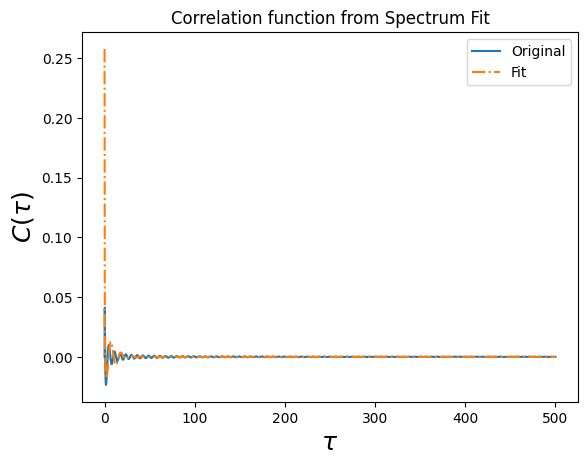

In [60]:
plt.plot(times,correlation(times),label="Original")
plt.plot(times,correlation_from_exponents(ckAR+1j*ckAI,vkAR+1j*vkAI,times),'-.',label="Fit")
plt.ylabel(r"$C(\tau)$",fontsize=18)
plt.xlabel(r"$\tau$",fontsize=18)
plt.title("Correlation function from Spectrum Fit")
plt.legend()
plt.show()

Problems here (Initially the list was longer)

1. The exponents generated from the fit are complex, They give rise to 1/F. But from this fitting I don't see how to make them real for now


In [61]:
aaaBath=heom.BosonicBath(Q,ckAR,vkAR+1j*vkAI,ckAI,vkAR+1j*vkAI)


In [62]:
HeOM_aaa = heom.HEOMSolver(H, aaaBath, max_depth=3,options={"atol": 1e-14,"nsteps":100000})
result_aaa=HeOM_aaa.run(rho0,times)

10.0%. Run time:  24.00s. Est. time left: 00:00:03:35
20.0%. Run time:  48.45s. Est. time left: 00:00:03:13
30.0%. Run time:  73.92s. Est. time left: 00:00:02:52
40.0%. Run time: 106.46s. Est. time left: 00:00:02:39
50.0%. Run time: 135.96s. Est. time left: 00:00:02:15
60.0%. Run time: 171.14s. Est. time left: 00:00:01:53
70.0%. Run time: 204.93s. Est. time left: 00:00:01:27
80.0%. Run time: 226.10s. Est. time left: 00:00:00:56
90.0%. Run time: 255.49s. Est. time left: 00:00:00:28
100.0%. Run time: 276.28s. Est. time left: 00:00:00:00
Total run time: 276.28s


Note this is fast even when the number of exponents is higher, probably due to the combine feature

In [63]:
def plot_pop(states,l=0,m=1):
    plt.plot(times,[i[l,m] for i in states[0].states],label="BR")
    plt.plot(times,[i[l,m] for i in states[1].states],"--",label="HEOM Corr")
    plt.plot(times,[i[l,m] for i in states[2].states],label="HEOM AAA")
    plt.plot(times,[i[l,m] for i in states[3].states],"--",label="Classical ME")
    plt.legend()
    #plt.xlim(0,100)
    

Well the classical bit is pretty good. AAA works nicely in this regime because we only care about the spectrum. And there's difficulties using the correlation function. Perhaps making it mire efficient would be the way to go. AAA is fast ~3s per simulation. I bet rescaling would make it faster :). Since there's at least one situation where AAA is better (without too much ram). We should perhaps implement spira which is a better version of AAA for this. While here I tried prony but did not like it :(

#### Using the spectral density

Probably not the best idea, because the number of exponents would grow drastically as this behaves like $T=0$. I just want to check whether one can fit the corresponding power spectrum using


$$S(\omega) = 2 J(\omega) \left( n(\omega) +1 \right)  $$

At $T=0$

$$S(\omega) = 2 J(\omega)  $$

so now one may see if it's easy to fit or whether it requires many exponents


In [64]:
from qutip.solver.heom import SpectralFitter

In [65]:
w2=np.linspace(0.1,100,1000)

In [66]:
spectral=SpectralFitter(1e-12,Q,w2,spectrum_f)

In [68]:
sbath,fitinfo=spectral.get_fit(N=1,Nk=20)

In [69]:
print(fitinfo["summary"])

Result of fitting The Spectral Density with 1 terms: 
 
 Parameters|   lam    |  gamma   |   w0 
 1         | 1.43e-01 | 3.52e+00 |1.10e-01
 
A  normalized RMSE of  1.59e-03 was obtained for the The Spectral Density
 The current fit took  0.010086 seconds


Evemthough the fit is good the effective spectral density is not because it only has 5 exponents per term in the fit

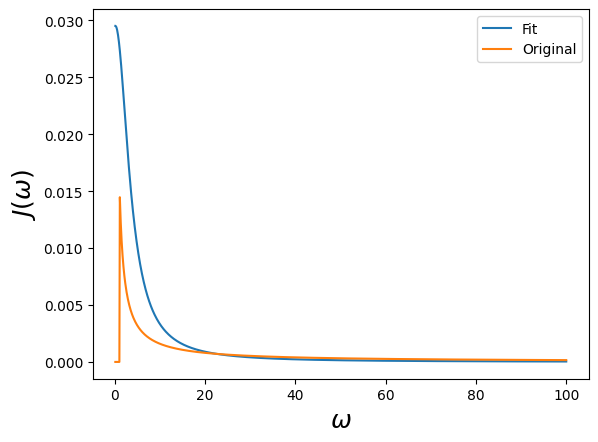

In [70]:
plt.plot(w2,sbath.spectral_density_approx(w2)/(2*np.pi),label="Fit")
plt.plot(w2,spectrum_f(w2),label="Original")
plt.ylabel(r"$J(\omega)$",fontsize=18)
plt.xlabel(r"$\omega$",fontsize=18)
plt.legend()
plt.show()

While the fit is ok, really hard to converge on the number of exponents as expected.

In [71]:
#from qutip import *


###############
#Attempt to construct purely rate-based version
#follow PRA 95, 052126 equation 42 onwards
# V = c_corr_list * s 
def TimeDepRates(H_S, V, ck,vk, tlist):
    print('Computing rates({length})'.format(length="tlist"))

    #given H_S, corr and tlist construct a superoperator for the time-dependent-rate MS.
    if not isinstance(H_S, (Qobj, QobjEvo)):
            raise TypeError("The Hamiltonian (H) must be a Qobj or QobjEvo")
            
    if not isinstance(V, (Qobj, QobjEvo)):
            raise TypeError("The coupling operator must be a Qobj or QobjEvo")                
    
    if H_S.type != "oper": 
            raise TypeError("The Hamiltonian (H) must be an operator not a state or superoperator")
    
    if V.type != "oper": 
            raise TypeError("The coupling operator must be an operator not a state or superoperator")
    
    energies,states = H_S.eigenstates()
    statesd = np.array([state.dag() for state in states])
    def com(V):
        return spre(V) - spost(V)
    
    C_array = np.zeros([len(tlist),len(states),len(states)], dtype = np.complex64)
    
    def approximated(ck,vk,ws,tlist):
        a=ck
        b=(1-np.exp((-vk+1j*ws)*tlist))/(vk-1j*ws)
        return a*b
    
    #simple version:
    
    for i in range(len(energies)):
        for j in range(len(energies)):
            for k, t in enumerate(tlist):
                Deltaij = energies[i] - energies[j]
                if V.matrix_element(states[i],states[j])!=0:
                    C_array[k, i, j] = np.sum([approximated(ck[i],vk[i],Deltaij,t) for i in range(len(ck))])
        
    Vt = com(sum([QobjEvo([(V.matrix_element(states[i], states[j])*states[i] * states[j].dag()), 
                           CubicSpline(tlist, C_array[:,i,j])]) 
                 for i in range(len(states)) for j in range(len(states))]))
    
    ##attempt to vectorize a bit, might be useful to fix for full PM model in the future
    #Deltaij = np.subtract.outer(energies, energies)
    #V_array = np.array([[V.matrix_element(i, j) for j in states] for i in states])
    #nonzero = np.nonzero(V_array)
    #for k, t in enumerate(tlist):
    #    C_array[k][nonzero] = integral(soft, Deltaij[nonzero], x_i=0, x_f=t, limit=500)
                

    #QobjEvo_list = []
    #for i in range(len(states)):
    #    for j in range(len(states)):
    #        V_ij = V_array[i, j]
    #        C_ij = C_array[:, i, j]
    #        if V_ij != 0:
    #            QobjEvo_list.append(QobjEvo([(V_ij * states[i] * states[j].dag()), Cubic_Spline(tlist[0], tlist[-1], C_ij)]))
            
    #Vt = com(sum(QobjEvo_list))
    
    L = liouvillian(QobjEvo(H_S)) - com(QobjEvo(V))*Vt
        
    return L

In [72]:
start=time.time()
L2=TimeDepRates(H,Q,2*np.pi*(ckAR+1j*ckAI),vkAR+1j*vkAI,times)
end=time.time()
end-start

Computing rates(tlist)


0.6119284629821777

In [73]:
L2(10)

Quantum object: dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), type='super', dtype=Dense, isherm=False
Qobj data =
[[ 2.97967522e-18+6.11988149e-19j -6.42760704e-19-1.00000000e+00j
  -1.31656381e-18+1.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 4.99720069e-03-9.79955687e-01j -8.30030332e-02+1.99852636e+00j
   0.00000000e+00+0.00000000e+00j -4.99720069e-03+9.79955687e-01j]
 [ 4.63134590e-03+9.81475638e-01j  0.00000000e+00+0.00000000e+00j
  -8.30030332e-02-2.00147364e+00j -4.63134590e-03-9.81475638e-01j]
 [ 0.00000000e+00+0.00000000e+00j -6.42760704e-19+1.00000000e+00j
  -1.31656381e-18-1.00000000e+00j  5.11691838e-18-3.06223627e-20j]]

In [74]:
sol_me2=mesolve(L2,rho0,times)

In [75]:
def plot_pop(states,l=1,m=1):
    #plt.plot(times,[i[l,m] for i in states[0].states],label="BR")
   # plt.plot(times,[i[l,m] for i in states[1].states],"--",label="HEOM Corr")
    plt.plot(times,[i[l,m] for i in states[2].states],label="HEOM AAA")
    plt.plot(times,[i[l,m] for i in states[3].states],"--",label="Classical ME")
    plt.plot(times,[i[l,m] for i in states[4].states],"--",label="Classical ME 2")

    plt.legend()
    #plt.xlim(0,100)
    

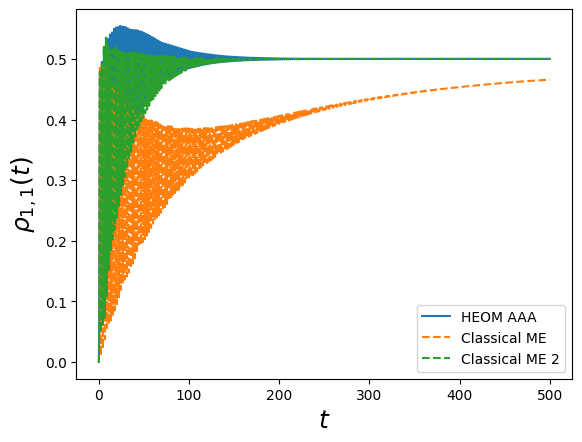

In [76]:
plot_pop([resultBR,result,sol_me,result_aaa,sol_me2])
plt.ylabel(r"$\rho_{1,1}(t)$",fontsize=18)
plt.xlabel(r"$t$",fontsize=18)
plt.show()

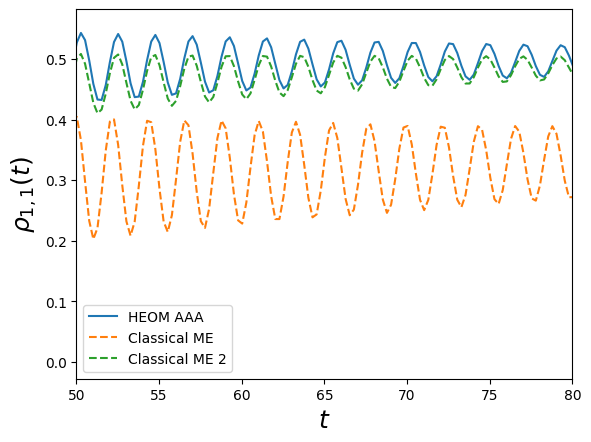

In [77]:
plot_pop([resultBR,result,sol_me,result_aaa,sol_me2])
plt.ylabel(r"$\rho_{1,1}(t)$",fontsize=18)
plt.xlabel(r"$t$",fontsize=18)
#plt.xlim(0,30)
plt.xlim(50,80)
plt.show()

In [78]:
1086.3488795757294/0.24817562103271484

4377.3392207308125